In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

#data 가져오기
data = pd.read_csv('https://raw.githubusercontent.com/k5yi/econ2005/master/team-project/1%EB%B6%84%EB%B0%981%EC%A1%B0/Raw_data.csv')

#data 정보
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        247 non-null    object 
 1   KOSPI        247 non-null    float64
 2   Price_Seoul  247 non-null    float64
 3   Homeloan     152 non-null    float64
 4   Call_rate    247 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.8+ KB


In [177]:
#data index 설정(월별)
data = data.set_index('Month')
data.head()

,KOSPI,Price_Seoul,Homeloan,Call_rate
Month,,,,
00-Jan,50.028099,50.165310,NaN,95.791583
00-Feb,51.263399,50.584944,NaN,100.601202
00-Mar,48.106345,51.004578,NaN,102.204409
00-Apr,45.702446,51.169888,NaN,102.204409
00-May,40.453994,51.169888,NaN,102.605210


In [178]:
#data 묘사
data.describe()

,KOSPI,Price_Seoul,Homeloan,Call_rate
count,247.000000,247.000000,152.000000,247.000000
mean,82.710846,95.912805,134.110270,60.175412
std,29.817486,21.574726,26.082133,26.572570
min,28.774836,50.165310,98.906850,9.619238
25%,50.417544,76.971007,116.035362,35.270541
50%,95.327181,103.496948,119.989913,60.320641
75%,105.246876,107.775941,158.315057,82.464930
max,133.063199,134.994913,188.502659,107.615230


In [179]:
#NaN 제거한 dataset 따로 생성
data_no_missing = data.dropna()
data_no_missing

,KOSPI,Price_Seoul,Homeloan,Call_rate
Month,,,,
07-Dec,100.000000,100.000000,100.000000,100.000000
08-Jan,90.982095,100.699390,99.966781,100.000000
08-Feb,88.736285,101.373347,98.906850,99.599198
08-Mar,86.720518,102.835707,98.999341,99.599198
08-Apr,93.308263,104.526958,99.782263,100.000000
...,...,...,...,...
20-Mar,93.842405,132.133774,184.506445,19.639279
20-Apr,97.142842,132.337233,186.123094,14.829659
20-May,103.213252,132.362665,187.335720,14.028056


In [180]:
data_no_missing.columns

Index(['KOSPI', 'Price_Seoul', 'Homeloan', 'Call_rate'], dtype='object')

In [181]:
#서울 아파트 가격에 따라 정렬
data_no_missing.sort_values(by = "Price_Seoul",ascending = False)

,KOSPI,Price_Seoul,Homeloan,Call_rate
Month,,,,
20-Jul,115.334114,134.994913,188.502659,9.619238
20-Jun,112.117186,133.062055,188.502659,9.619238
20-May,103.213252,132.362665,187.335720,14.028056
20-Apr,97.142842,132.337233,186.123094,14.829659
20-Mar,93.842405,132.133774,184.506445,19.639279
...,...,...,...,...
13-Aug,99.630775,102.403357,116.933596,50.100200
13-Sep,104.222711,102.390641,116.830217,50.100200
08-Feb,88.736285,101.373347,98.906850,99.599198


In [182]:
#상관계수 구하기
data_no_missing.corr()

,KOSPI,Price_Seoul,Homeloan,Call_rate
KOSPI,1.000000,0.415818,0.678826,-0.452644
Price_Seoul,0.415818,1.000000,0.880687,-0.524895
Homeloan,0.678826,0.880687,1.000000,-0.730062
Call_rate,-0.452644,-0.524895,-0.730062,1.000000


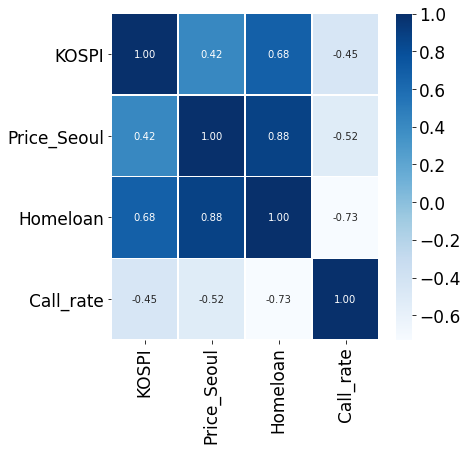

In [183]:
#heatmap을 이용한 시각화
plt.figure(figsize=(6,6))
sns.heatmap(data = data_no_missing.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [184]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [185]:
#첫번째 회귀분석 - Call_rate ~ KOSPI
df_1 = data_no_missing[["KOSPI","Call_rate"]]

In [186]:
df_1.head()

,KOSPI,Call_rate
Month,,
07-Dec,100.000000,100.000000
08-Jan,90.982095,100.000000
08-Feb,88.736285,99.599198
08-Mar,86.720518,99.599198
08-Apr,93.308263,100.000000


In [187]:
#회귀분석
res_1 = smf.ols(formula='Call_rate ~ KOSPI', data=df_1).fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:              Call_rate   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     38.65
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           4.78e-09
Time:                        10:58:45   Log-Likelihood:                -659.08
No. Observations:                 152   AIC:                             1322.
Df Residuals:                     150   BIC:                             1328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.5695     10.533     10.402      0.0

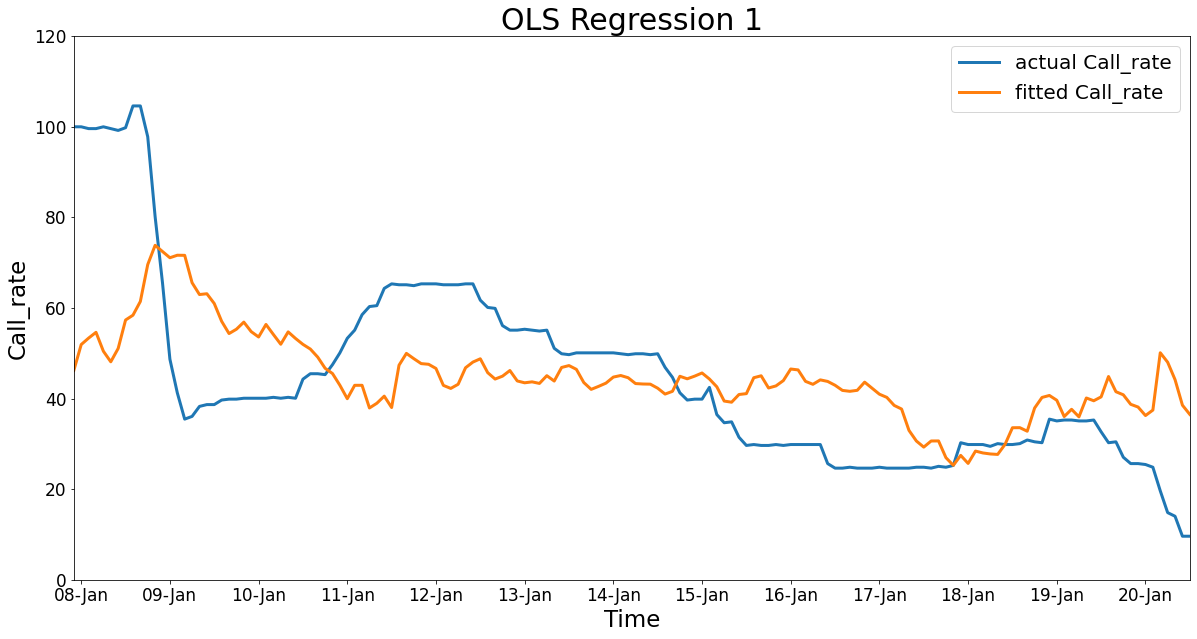

In [188]:
y_predict = res_1.params[0] + res_1.params[1]*df_1['KOSPI']
plt.figure(figsize=(20, 10))
plt.plot(df_1['Call_rate'], linewidth=3, label = 'actual Call_rate')
plt.plot(y_predict,linewidth=3,label = 'fitted Call_rate')
plt.xlim(0,151)
plt.ylim(0,120)
plt.xticks(["08-Jan","09-Jan","10-Jan","11-Jan","12-Jan","13-Jan","14-Jan","15-Jan","16-Jan","17-Jan","18-Jan","19-Jan","20-Jan"])

plt.xlabel('Time')
plt.ylabel('Call_rate')
plt.title('OLS Regression 1')
plt.rc('axes',titlesize = 30)
plt.rc('axes',labelsize = 23)
plt.rc('xtick',labelsize = 17)
plt.rc('ytick',labelsize = 17)
plt.rc('legend',fontsize = 20)
plt.legend()
plt.show()

In [189]:
#두번째 회귀분석 - Homeloan - Call_rate
df_2 = data_no_missing[["Homeloan","Call_rate"]]

In [190]:
df_2.head()

,Homeloan,Call_rate
Month,,
07-Dec,100.000000,100.000000
08-Jan,99.966781,100.000000
08-Feb,98.906850,99.599198
08-Mar,98.999341,99.599198
08-Apr,99.782263,100.000000


In [191]:
#회귀분석
res_2 = smf.ols(formula='Homeloan ~ Call_rate', data=df_2).fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Homeloan   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     171.2
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           1.40e-26
Time:                        10:58:50   Log-Likelihood:                -653.02
No. Observations:                 152   AIC:                             1310.
Df Residuals:                     150   BIC:                             1316.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    175.0824      3.451     50.732      0.0

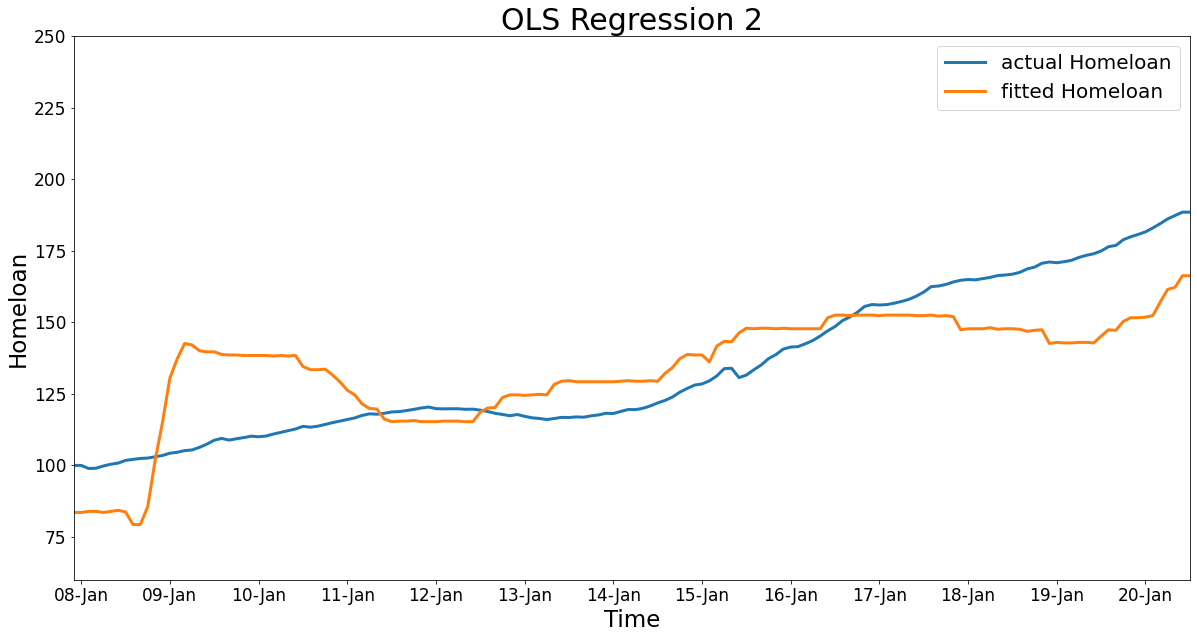

In [192]:
y_predict = res_2.params[0] + res_2.params[1]*df_2['Call_rate']
plt.figure(figsize=(20, 10))
plt.plot(df_2['Homeloan'], linewidth=3, label = 'actual Homeloan')
plt.plot(y_predict,linewidth=3,label = 'fitted Homeloan')
plt.xlim(0,151)
plt.ylim(60,250)
plt.xticks(["08-Jan","09-Jan","10-Jan","11-Jan","12-Jan","13-Jan","14-Jan","15-Jan","16-Jan","17-Jan","18-Jan","19-Jan","20-Jan"])
plt.xlabel('Time')
plt.ylabel('Homeloan')
plt.title('OLS Regression 2')

plt.rc('axes',titlesize = 30)
plt.rc('axes',labelsize = 23)
plt.rc('xtick',labelsize = 17)
plt.rc('ytick',labelsize = 17)
plt.rc('legend',fontsize = 20)
plt.legend()
plt.show()

In [193]:
#마지막 회귀분석 - Homeloan, Price_Seoul
df_3 = data_no_missing[["Homeloan","Price_Seoul"]]

In [194]:
df_3.head()

,Homeloan,Price_Seoul
Month,,
07-Dec,100.000000,100.000000
08-Jan,99.966781,100.699390
08-Feb,98.906850,101.373347
08-Mar,98.999341,102.835707
08-Apr,99.782263,104.526958


In [195]:
#회귀분석
res_3 = smf.ols(formula='Price_Seoul ~ Homeloan', data=df_3).fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Seoul   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     518.5
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           1.56e-50
Time:                        10:58:50   Log-Likelihood:                -433.49
No. Observations:                 152   AIC:                             871.0
Df Residuals:                     150   BIC:                             877.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.1863      1.798     39.030      0.0

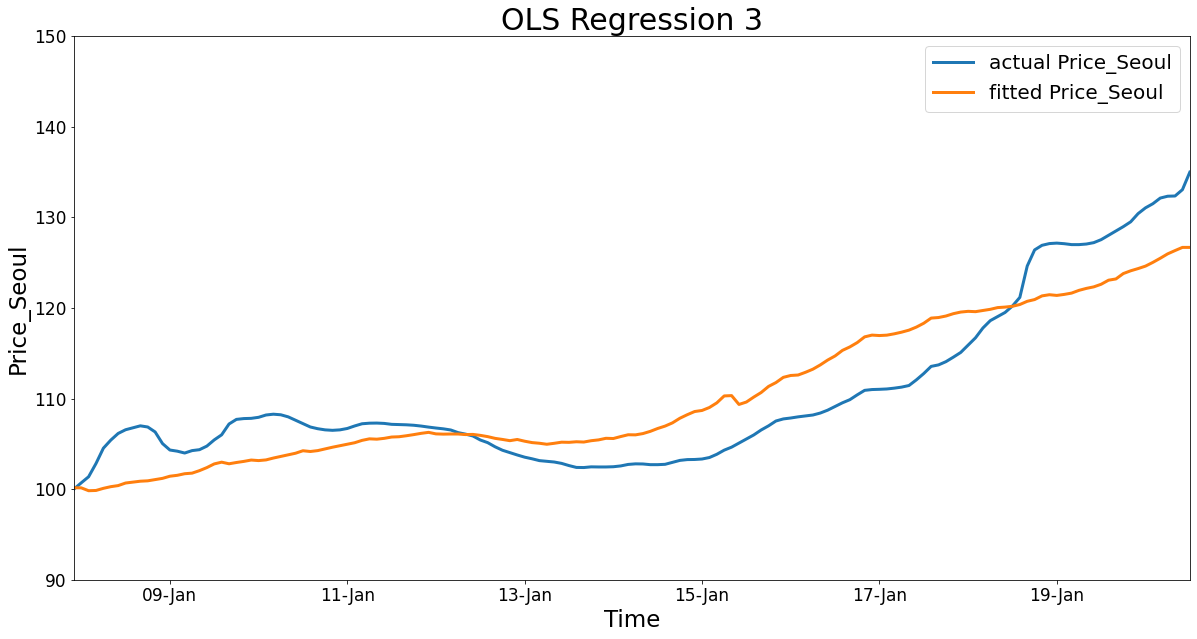

In [196]:
y_predict = res_3.params[0] + res_3.params[1]*df_3['Homeloan']
plt.figure(figsize=(20, 10))
plt.plot(df_3['Price_Seoul'], linewidth=3, label = 'actual Price_Seoul')
plt.plot(y_predict,linewidth=3,label = 'fitted Price_Seoul')
plt.xlim(0,151)
plt.ylim(90,150)
plt.xticks(["09-Jan","11-Jan","13-Jan","15-Jan","17-Jan","19-Jan"])
plt.xlabel('Time')
plt.ylabel('Price_Seoul')
plt.title('OLS Regression 3')

plt.rc('axes',titlesize = 30)
plt.rc('axes',labelsize = 23)
plt.rc('xtick',labelsize = 17)
plt.rc('ytick',labelsize = 17)
plt.rc('legend',fontsize = 20)
plt.legend()
plt.show()